# EDA + Logistic Regression on Iris Dataset (Beginner-Friendly, Expanded Descriptions)

This notebook demonstrates **Exploratory Data Analysis (EDA)** on the Iris dataset using:
- Bar Plot
- Histogram
- Pie Chart
- Violin Plot
- Scatter Plot

Each plot is **introduced with clear guidance on when to use it and how to read it**.

Finally, we split the data into **train/test**, train a **Logistic Regression** model, make predictions, and show the **Confusion Matrix**.

## Load Libraries & Dataset
We use Pandas for data handling, Matplotlib/Seaborn for visualization, and scikit-learn for ML.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#create a new target column with the species names
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Bar Plot — When & Why to Use

**Use a Bar Plot when you want to compare a numeric value across categories.**

**Typical use-cases:**
- Compare averages or counts across groups (e.g., average petal length by species).
- Compare performance/metrics across categories.

**How to read:**
- Taller bar → larger value (e.g., higher average).
- Bars close in height → categories are similar.

**Here:** We compare **average petal length** across species.

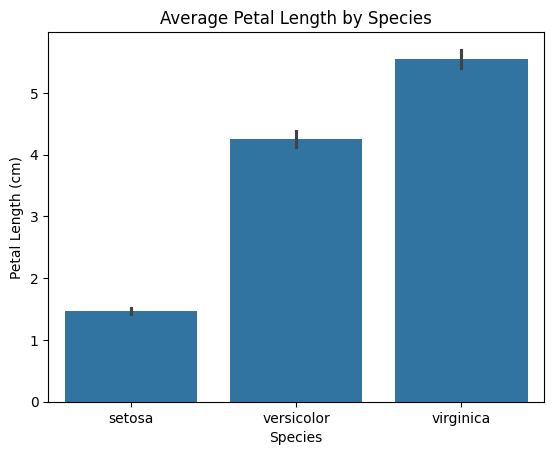

In [6]:
plt.figure()
sns.barplot(data=df, x='species', y='petal length (cm)')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

## Histogram — When & Why to Use

**Use a Histogram to understand the distribution of a numeric variable.**

**Typical use-cases:**
- Check spread of values.
- Identify skewness (left/right).
- See common ranges and rare values.

**How to read:**
- Taller bars → more observations in that range.
- Long tail → skewed distribution.
- Multiple peaks → possible sub-groups in data.

**Here:** We plot the distribution of **sepal length**.

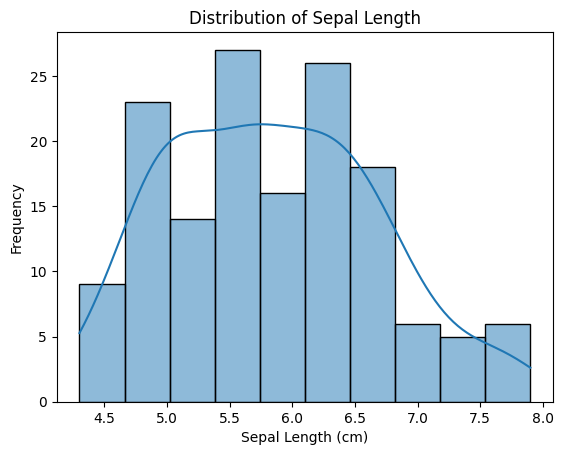

In [7]:
plt.figure()
sns.histplot(df['sepal length (cm)'], bins=10, kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

## Pie Chart — When & Why to Use

**Use a Pie Chart to show proportions/percentages of categories in a whole.**

**Typical use-cases:**
- Show class balance in a dataset.
- Show share of each category.

**How to read:**
- Bigger slice → larger proportion.
- All slices together = 100%.

**Here:** We show the **proportion of each species** in the dataset.

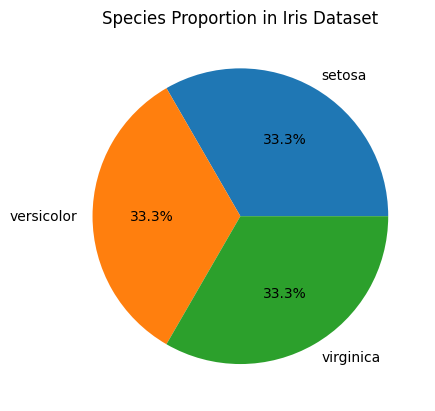

In [8]:
counts = df['species'].value_counts()
plt.figure()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Species Proportion in Iris Dataset')
plt.show()

## Violin Plot — When & Why to Use

**A violin plot shows the distribution of data and key statistics at the same time.**

**Typical use-cases:**
- Compare full distributions across categories.
- See density + median + spread together.

**How to read (quick guide):**
- Wider part = more data points there
- Narrow part = fewer data points
- Center line/dot = median
- Overall height = range of values

**Here:** We compare **petal width distribution** across species.

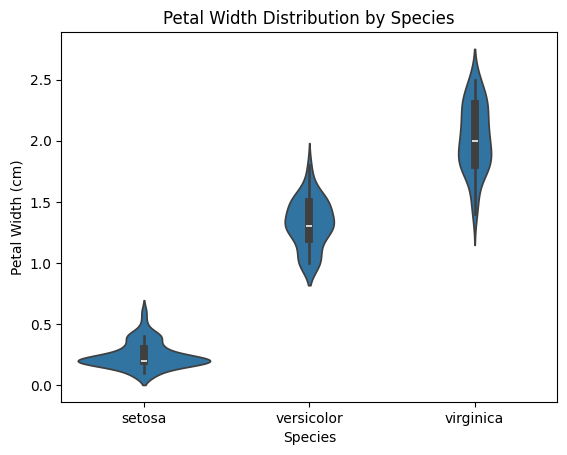

In [9]:
plt.figure()
sns.violinplot(data=df, x='species', y='petal width (cm)')
plt.title('Petal Width Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

## Scatter Plot — When & Why to Use

**Use a Scatter Plot to study the relationship between two numeric variables.**

**Typical use-cases:**
- Check correlation (positive/negative/no trend).
- Identify clusters or separability between classes.
- Spot outliers.

**How to read:**
- Upward trend → positive relationship.
- Downward trend → negative relationship.
- Clear clusters (with hue) → classes may be separable.

**Here:** We plot **petal length vs petal width** with species as color.

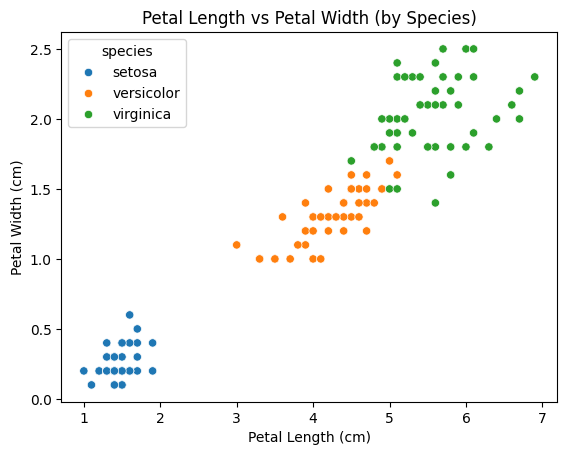

In [10]:
plt.figure()
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Petal Length vs Petal Width (by Species)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

## Train-Test Split & Logistic Regression

**Why split?**
- Train set teaches the model.
- Test set evaluates performance on unseen data.

**Logistic Regression** is a simple and strong baseline for classification problems.

In [12]:
X = df.drop(columns=['target', 'species'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

## Confusion Matrix — How to Read

- Rows = Actual classes
- Columns = Predicted classes
- Diagonal values = Correct predictions
- Off-diagonal values = Misclassifications

A stronger model has most values on the diagonal.